In [4]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("./data/raw_analyst_ratings.csv")

In [27]:
data.head(10)

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,publication_date
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,2020-06-05
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,2020-06-03
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,2020-05-26
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,2020-05-22
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,2020-05-22
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A,71,2020-05-22
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A,73,2020-05-22
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A,120,2020-05-22
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A,84,2020-05-22
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A,42,2020-05-22


In [5]:
data.describe()

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [6]:
data.shape


(1407328, 6)

In [10]:
spliet_data=data.iloc[:,0].astype(str).str.split(",", expand=True)

In [11]:
spliet_data.head()


,0
0,0
1,1
2,2
3,3
4,4


In [14]:
data["headline_length"]=data["headline"].apply(len)

In [15]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


In [17]:
data["headline_length"].describe()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

In [18]:
data["publisher"].value_counts()

publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64

In [6]:
data['publication_date'] = data['date'].str.split(' ').str[0]

In [38]:
particular_day = data.groupby(data['publication_date'].dt.date).size()
print(particular_day)

publication_date
2009-02-14      1
2009-04-27      2
2009-04-29      1
2009-05-22      1
2009-05-27      6
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Length: 3955, dtype: int64


In [7]:
data.isnull().sum()

Unnamed: 0          0
headline            0
url                 0
publisher           0
date                0
stock               0
publication_date    0
dtype: int64

In [36]:
print(data['publication_date'].dtype)

datetime64[ns]


In [35]:
data['publication_date'] = pd.to_datetime(data['publication_date'], errors='coerce')

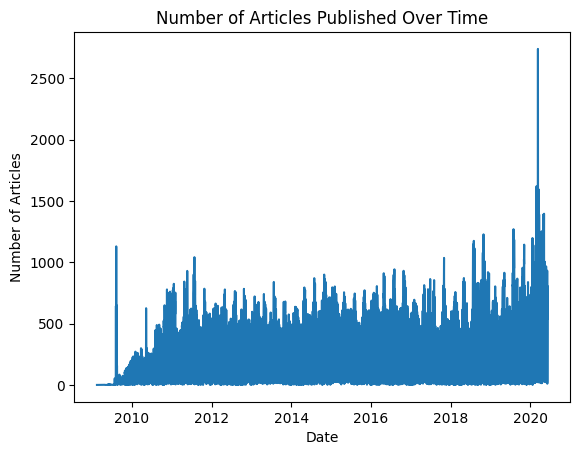

In [39]:
particular_day.plot(kind='line')
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()